In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout, Reshape
from keras.layers import UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.models import Sequential, Model

In [3]:
ds = pd.read_csv('../train.csv')
data = ds.values[:10000]

X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(10000, 784) (10000, 10)


In [4]:
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(8000, 28, 28, 1) (8000, 10)
(2000, 28, 28, 1) (2000, 10)


In [15]:
model = Sequential()
act = 'relu'

model.add(Conv2D(32, 3, input_shape=(28, 28, 1)))
model.add(Activation(act))

model.add(Conv2D(16, 3))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation(act))

model.add(Conv2D(8, 5))
model.add(Activation(act))

model.add(Flatten())
model.add(Dense(2))

model.add(Dense(512))
model.add(Activation(act))

model.add(Reshape((8, 8, 8)))
model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Conv2D(16, 5, padding='same'))
model.add(Activation(act))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Conv2D(32, 3, padding='same'))
model.add(Activation(act))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Conv2D(1, 3, padding='same'))
model.add(Activation(act))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_39 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
activation_40 (Activation)   (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 8)           3208      
_________________________________________________________________
activation_41 (Activation)   (None, 8, 8, 8)           0         
__________

In [16]:
hist = model.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, X_test),
                verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
17s - loss: 0.0688 - acc: 0.7982 - val_loss: 0.0616 - val_acc: 0.7962
Epoch 2/10
17s - loss: 0.0581 - acc: 0.7963 - val_loss: 0.0570 - val_acc: 0.7954
Epoch 3/10
16s - loss: 0.0559 - acc: 0.7962 - val_loss: 0.0559 - val_acc: 0.7962
Epoch 4/10
16s - loss: 0.0544 - acc: 0.7959 - val_loss: 0.0542 - val_acc: 0.7908
Epoch 5/10
16s - loss: 0.0530 - acc: 0.7956 - val_loss: 0.0527 - val_acc: 0.7947
Epoch 6/10
16s - loss: 0.0519 - acc: 0.7956 - val_loss: 0.0516 - val_acc: 0.7918
Epoch 7/10
16s - loss: 0.0512 - acc: 0.7957 - val_loss: 0.0521 - val_acc: 0.7858
Epoch 8/10
16s - loss: 0.0504 - acc: 0.7960 - val_loss: 0.0504 - val_acc: 0.7903
Epoch 9/10
16s - loss: 0.0499 - acc: 0.7962 - val_loss: 0.0497 - val_acc: 0.7928
Epoch 10/10
16s - loss: 0.0492 - acc: 0.7962 - val_loss: 0.0491 - val_acc: 0.7972


In [17]:
out = model.predict(X_train[:10])
print out.shape

(10, 28, 28, 1)


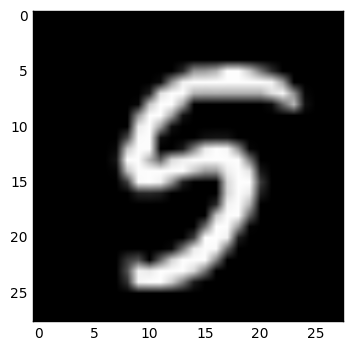

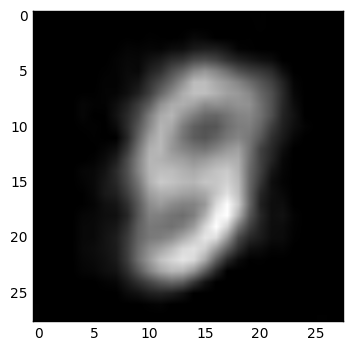

In [19]:
plt.figure(0)
plt.imshow(X_train[8].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.imshow(out[8].reshape((28, 28)), cmap='gray')

plt.show()

In [20]:
model.layers

In [21]:
m = Model(inputs=model.input, outputs=model.layers[8].output)
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_39 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
activation_40 (Activation)   (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 8)           3208      
__________